In [7]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_best_scores_table, get_scores_skills_table

In [9]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
    "bayesian",
    "batchensemble",
]
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
# dataset_ls = ["naval"]#, "wine"]
_datasets = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]


In [10]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
distr_ls = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [5]:
data_path_normal = os.path.join("..", "..", "04_Experiments", "Normal")
data_path_trunc = os.path.join("..", "..", "04_Experiments", "t_Normal")
data_path_0trunc = os.path.join("..", "..", "04_Experiments", "0t_Normal")

In [11]:
# Get all skills table
df_scores_norm, df_skills_norm = get_scores_skills_table(data_path_normal, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

dataset_ls_tnorm = [
    "naval",
    "wine",
]
df_scores_tnorm, df_skills_tnorm = get_scores_skills_table(data_path_trunc, dataset_ls_tnorm, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

df_scores_0tnorm, df_skills_0tnorm = get_scores_skills_table(data_path_0trunc, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

df_scores_norm["distr"] = "norm"
df_skills_norm["distr"] = "norm"
df_scores_tnorm["distr"] = "tnorm"
df_skills_tnorm["distr"] = "tnorm"
df_scores_0tnorm["distr"] = "0tnorm"
df_skills_0tnorm["distr"] = "0tnorm"

In [12]:
df_scores = pd.concat([df_scores_norm, df_scores_tnorm, df_scores_0tnorm], ignore_index=True)
df_skills = pd.concat([df_skills_norm, df_skills_tnorm, df_skills_0tnorm], ignore_index=True)

In [46]:
df_temp = df_scores[(df_scores["nn"] == "drn") & (df_scores["agg"] != "ens")].sort_values(["dataset", "score_10"], ascending=True).groupby("dataset").head(1)
best_distr_choice = dict(zip(df_temp["dataset"], df_temp["distr"]))
best_distr_choice

{'boston': 'norm',
 'concrete': '0tnorm',
 'energy': '0tnorm',
 'kin8nm': 'norm',
 'naval': 'norm',
 'power': '0tnorm',
 'protein': '0tnorm',
 'wine': 'tnorm',
 'yacht': 'norm'}

In [47]:
df_temp

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score,distr
1,rand_init,boston,drn,vi,1.880447,1.880195,1.877956,1.879042,1.878322,1.879192,norm
1584,batchensemble,concrete,drn,lp,4.807906,4.834749,4.774216,4.778541,4.759727,4.791028,0tnorm
1491,bayesian,energy,drn,vi-w,1.553452,1.553084,1.552722,1.553004,1.552926,1.553038,0tnorm
472,concrete_dropout,kin8nm,drn,vi-aw,0.047664,0.046642,0.046209,0.046010,0.045894,0.046484,norm
156,bagging,naval,drn,lp,0.001407,0.001384,0.001378,0.001380,0.001380,0.001386,norm
1528,bayesian,power,drn,vi-aw,2.401428,2.397910,2.397493,2.397222,2.396780,2.398167,0tnorm
1432,concrete_dropout,protein,drn,vi-aw,2.381925,2.380976,2.380785,2.380680,2.380581,2.380990,0tnorm
768,rand_init,wine,drn,lp,0.353752,0.352950,0.353191,0.353009,0.352615,0.353103,tnorm
744,batchensemble,yacht,drn,lp,1.631673,1.644962,1.596771,1.582200,1.582375,1.607596,norm


In [48]:
df_temp2 = df_scores.copy()
for idx, row in df_temp2.iterrows():
    if row["nn"] == "drn":
        is_distr = row["distr"]
        should_distr = best_distr_choice[row["dataset"]]
        is_dataset = row["dataset"]
        if row["distr"] == best_distr_choice[row["dataset"]]:
            continue
        else:
            print(f"Drop ({idx} - {is_distr}) as {is_dataset} is not {should_distr}")
            df_temp2.drop(labels=idx, axis=0, inplace=True)
    else:
        if row["distr"] != "norm":
            print("Drop bqn row")
            df_temp2.drop(labels=idx, axis=0, inplace=True)
df_temp2

Drop (12 - norm) as concrete is not 0tnorm
Drop (13 - norm) as concrete is not 0tnorm
Drop (14 - norm) as concrete is not 0tnorm
Drop (15 - norm) as concrete is not 0tnorm
Drop (16 - norm) as concrete is not 0tnorm
Drop (17 - norm) as concrete is not 0tnorm
Drop (24 - norm) as energy is not 0tnorm
Drop (25 - norm) as energy is not 0tnorm
Drop (26 - norm) as energy is not 0tnorm
Drop (27 - norm) as energy is not 0tnorm
Drop (28 - norm) as energy is not 0tnorm
Drop (29 - norm) as energy is not 0tnorm
Drop (60 - norm) as power is not 0tnorm
Drop (61 - norm) as power is not 0tnorm
Drop (62 - norm) as power is not 0tnorm
Drop (63 - norm) as power is not 0tnorm
Drop (64 - norm) as power is not 0tnorm
Drop (65 - norm) as power is not 0tnorm
Drop (72 - norm) as protein is not 0tnorm
Drop (73 - norm) as protein is not 0tnorm
Drop (74 - norm) as protein is not 0tnorm
Drop (75 - norm) as protein is not 0tnorm
Drop (76 - norm) as protein is not 0tnorm
Drop (77 - norm) as protein is not 0tnorm
Drop

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score,distr
0,rand_init,boston,drn,lp,1.880196,1.882215,1.874762,1.884769,1.880862,1.880561,norm
1,rand_init,boston,drn,vi,1.880447,1.880195,1.877956,1.879042,1.878322,1.879192,norm
2,rand_init,boston,drn,vi-a,1.894677,1.895243,1.893030,1.893910,1.893242,1.894020,norm
3,rand_init,boston,drn,vi-w,1.896980,1.897274,1.895165,1.896109,1.895413,1.896188,norm
4,rand_init,boston,drn,vi-aw,1.901667,1.902644,1.901496,1.902405,1.901480,1.901939,norm
...,...,...,...,...,...,...,...,...,...,...,...
1645,batchensemble,protein,drn,vi,2.482242,2.473254,2.471886,2.472328,2.468923,2.473727,0tnorm
1646,batchensemble,protein,drn,vi-a,2.475558,2.469606,2.470526,2.470618,2.467614,2.470784,0tnorm
1647,batchensemble,protein,drn,vi-w,2.477235,2.470152,2.470584,2.470585,2.467519,2.471215,0tnorm
1648,batchensemble,protein,drn,vi-aw,2.475075,2.467953,2.469589,2.469649,2.466490,2.469751,0tnorm


In [49]:
for goupname, group in df_temp2.groupby("dataset"):
    print(group["dataset"].unique())
    print(group["distr"].unique())
    print()

['boston']
['norm']

['concrete']
['norm' '0tnorm']

['energy']
['norm' '0tnorm']

['kin8nm']
['norm']

['naval']
['norm']

['power']
['norm' '0tnorm']

['protein']
['norm' '0tnorm']

['wine']
['norm' 'tnorm']

['yacht']
['norm']



In [43]:
n_dataset = 9
n_nn = 2
n_agg = 6
n_ens_method = 7
print(n_dataset*n_nn*n_agg*n_ens_method)

756


In [50]:
df_temp2["agg"].unique()

array(['lp', 'vi', 'vi-a', 'vi-w', 'vi-aw', 'ens'], dtype=object)

In [51]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]
show_outliers=False

In [52]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Dropout",
    "variational_dropout": "Var. Drop.",
    "concrete_dropout": "Conc. Drop.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8192)",
    "naval": "Naval Propulsion \n (N=11934)",
    "power": "Power Plant \n (N=9568)",
    "protein": "Protein Structure \n (N=45730)",
    "wine": "Wine Quality Red \n (N=1599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [53]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

Text(0.5, 0.9, 'CRPS-Skill aggregated over ensemble methods \n (Higher is better)')

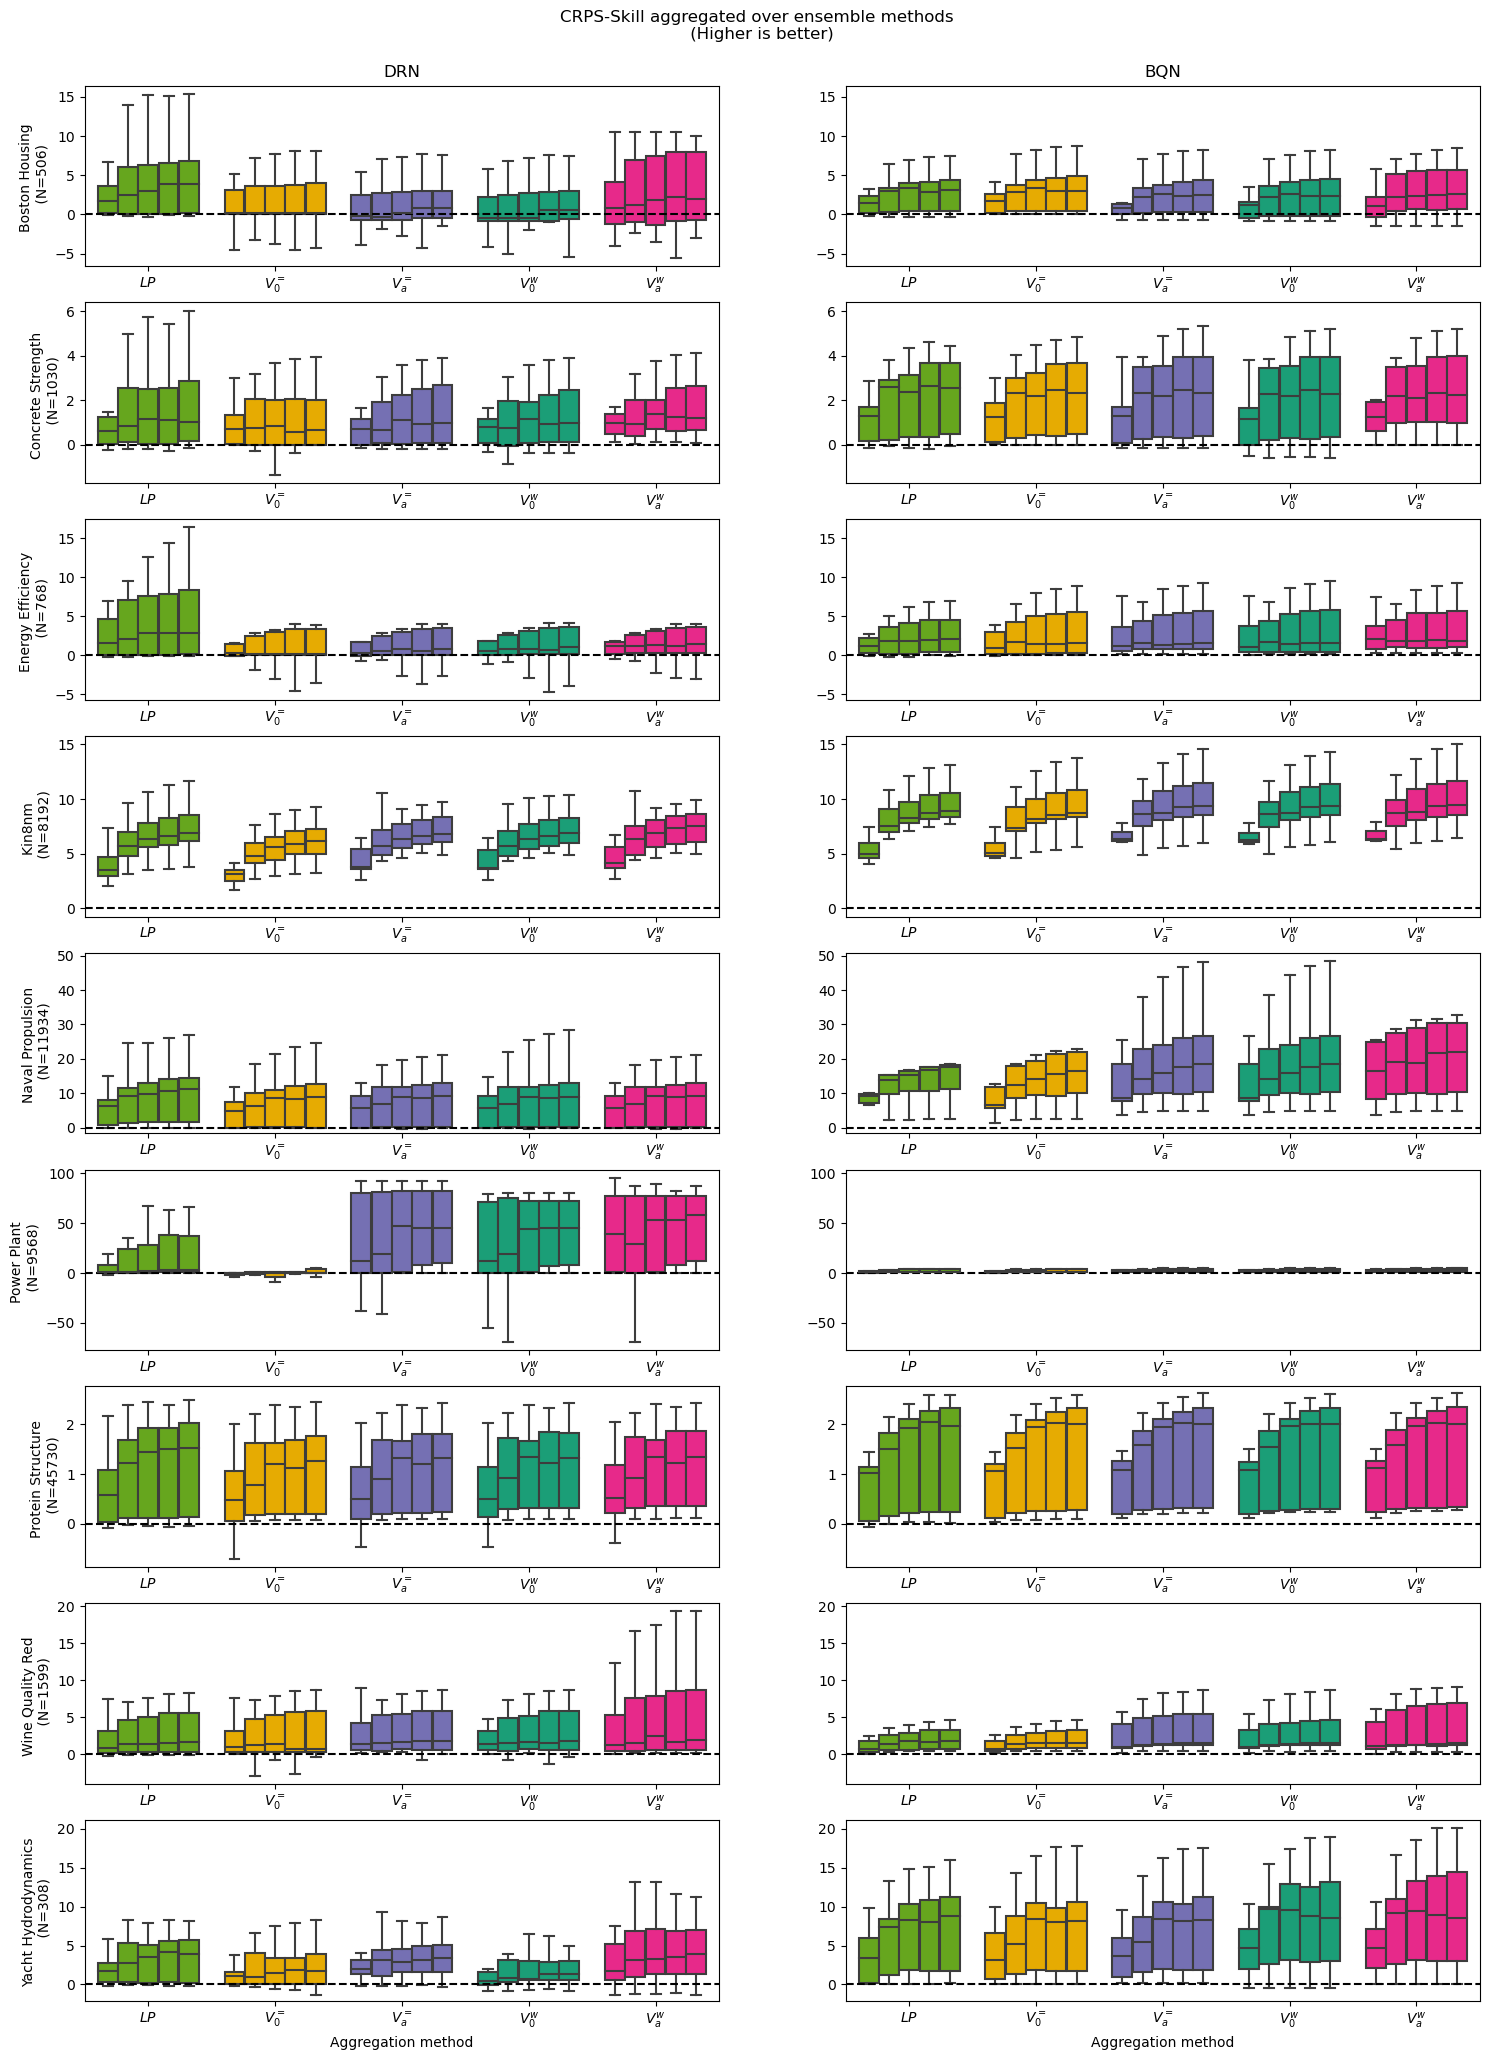

In [54]:
##### Skill - Boxplots - x=aggregation_methods #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="agg", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Aggregation method")

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        agg_col_ls = list(agg_col.values())[:5]
        for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
            boxplot.set_facecolor(agg_col_ls[i//5])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.87)
fig.suptitle(f"CRPS-Skill aggregated over ensemble methods \n (Higher is better)", y=0.9)

# Save figure
# if export:
#     if show_outliers:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.png")
#         fig.savefig(filename, bbox_inches='tight')
#     else:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.png")
#         fig.savefig(filename, bbox_inches='tight')